The following is a basic code I've constructed just to resize the image and output it. This is going to require a lot more work, but I just wanted to take one shot at it to see how it goes.


In [85]:
#Imports for the specific code
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


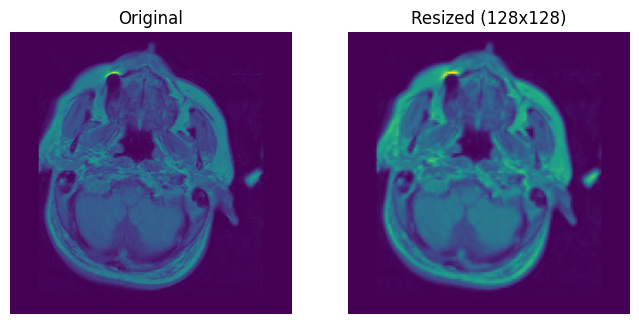

In [86]:
#load the URL for my GitHub
url = "https://raw.githubusercontent.com/Aditsmishra2005/APS360---Project/a196288235d31cf3424d16974f04825152ef569a/parkinsons_dataset1/parkinson/DUAL_TSE_001.png"
result = requests.get(url)
photo = Image.open(BytesIO(result.content))

photo_resized = photo.resize((128,128))
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

#Duisplay the Original for a reference
axes[0].imshow(photo)
axes[0].set_title("Original")
axes[0].axis("off")

#Display the resized for a reference
axes[1].imshow(photo_resized)
axes[1].set_title("Resized (128x128)")
axes[1].axis("off")

plt.show()

Okay following the intial documentation shown above I decided to construct my model, my base model is an ANN and I planned to do some basic data augmentation to increase the data quantity I have. I planned to use the Lab Three framework to import my dataset from google drive.

In [87]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os

Now I load the dataset, and to do this I basically uploaded all the images from my dataset to the drive.

In [88]:
import torchvision.datasets as d
data = d.ImageFolder(r'C:\APS360---Project\parkinsons_dataset1')

In [89]:
paths = [sample[0] for sample in data.samples]  # or data.imgs
labels = [sample[1] for sample in data.samples]

Now I plan to just check that the data is imported.

In [90]:
print(len(data)) # with this I can see that the amount of datasets are complete.

1662


This next portion is the deletion portion if the rotated images are too many then I do this, but I'm only doubling my dataset. So only run it if I need to delete data.

In [101]:
base_path = r'C:\APS360---Project\parkinsons_dataset1'  # set the path
classes = ['normal', 'parkinson'] #Adjusting the classes as needed

for cls in classes:
    class_directory = os.path.join(base_path, cls)
    for name in os.listdir(class_directory):
        if '_rot' in name:
            file_path = os.path.join(class_directory, name)
            print(f"Deleting {file_path}")
            os.remove(file_path)

Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_001_rot-4.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_001_rot22.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_001_rot22_rot-27.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_002_rot28.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_002_rot30.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_002_rot30_rot-4.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_003_rot15.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_003_rot2.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\ep2d_diff_3scan_trace_p2_ADC_DFC_003_rot2_rot4.png
Deleting C:\APS360---Project\parkinsons_dataset1\normal\e

Doubling the dataset by performing roations, this is my main form of augmentation. I will say that this was largely Perplexity generated. I know I would normall have to disclose this, but I did modify the code slightly. Not very familiar with heavy data augmentation.

In [104]:
from PIL import Image
import os
import random

# setting the correct path
base_path = r'C:\APS360---Project\parkinsons_dataset1'  # set the path
classes = ['normal', 'parkinson']   # names of the two classes I have

angle_range = (-30, 30)  # Can't rotate it too much, because in medical imaging x-rays are taken at certain angles anyways and certain directions.

for cls in classes: #makes sense
    class_directory = os.path.join(base_path, cls)
    for name in os.listdir(class_directory):
        if name.endswith('.jpg') or name.endswith('.png'):
            img_path = os.path.join(class_directory, name)
            img = Image.open(img_path)#grab original image
            angle = random.randint(*angle_range)#rotate using the angle range
            rotated_img = img.rotate(angle)
            new_fname = f"{os.path.splitext(name)[0]}_rot{angle}{os.path.splitext(name)[1]}"#save with new name
            rotated_img.save(os.path.join(class_directory, new_fname))


Check the new total dataset amounts!

In [105]:
data = d.ImageFolder(r'C:\APS360---Project\parkinsons_dataset1')

In [106]:
print(len(data)) #data has officially doubled now

1662


The next portion is going to be me resizing the images by making them all 128x128. I'm going to replace the images all in the google drive folder.

In [107]:
target_size = (128, 128) #Looking at 128x128 so a total of 16,384 features
for cls in classes:
    class_directory = os.path.join(base_path, cls)
    for name in os.listdir(class_directory):
        if name.endswith('.jpg') or name.endswith('.png'):
            img_path = os.path.join(class_directory, name)
            img = Image.open(img_path)
            img_resized = img.resize(target_size)

            img_resized.save(img_path)#save the resized image to the appropriate path

Now that all my data is processed and ready I'm going to pull a few images to get a sense of what the data looks like.

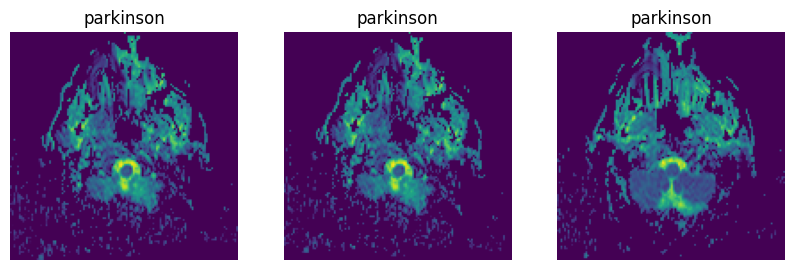

In [108]:
for cls in classes:
    class_dir = os.path.join(base_path, cls)
    images = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]

plt.figure(figsize=(10,3))
for i, img_name in enumerate(images[:3]):  # first 3 images
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.title(f"{cls}")
        plt.axis('off')
plt.show()

Showing the example images of the data that will be processed in section above.

In [109]:
from torchvision import datasets, transforms

data_dir = r"C:\APS360---Project\parkinsons_dataset1"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In the above I've taken all my data and transformed them to tensors so my model can train on it.

In [110]:
import torch
from torch.utils.data import random_split

N = len(full_dataset)
n_test = int(0.2 * N)
n_trainval = N - n_test

trainval_dataset, test_dataset = random_split(
    full_dataset,
    [n_trainval, n_test],
    generator=torch.Generator().manual_seed(42),
)

n_train = int(0.8 * n_trainval)
n_val = n_trainval - n_train

train_dataset, val_dataset = random_split(
    trainval_dataset,
    [n_train, n_val],
    generator=torch.Generator().manual_seed(42),
)


Here now, I've seperated my datasets the test_dataset is the one the models don't get to see.

In [111]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [112]:
def make_loaders(batchsize, num_workers=0):
    train_loader = DataLoader(train_dataset, batch_size=batchsize,
                              shuffle=True, num_workers=num_workers)
    val_loader   = DataLoader(val_dataset, batch_size=batchsize,
                              shuffle=False, num_workers=num_workers)
    return train_loader, val_loader

Now that I've split my data, I'll add the basic functions needed to ensure that I can train and evaluate my models.

In [ ]:
def trainnet(net, batchsize, learning_rate, epoch, train_dataset, val_dataset):
    # Optimizer and loss
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.7)
    loss_func = nn.CrossEntropyLoss()

    # Metrics storage
    train_error = np.zeros(epoch)
    train_loss = np.zeros(epoch)
    val_error = np.zeros(epoch)
    val_loss = np.zeros(epoch)

    # Create DataLoaders here using batchsize
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batchsize, shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=batchsize, shuffle=False
    )

    for e in range(epoch):
        net.train()
        total_train_samples = 0
        train_loss_sum = 0.0
        train_error_sum = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            output = net(images)
            loss = loss_func(output, labels)
            loss.backward()
            optimizer.step()

            train_loss_sum += loss.item() * images.size(0)
            _, predicted = torch.max(output.data, 1)
            train_error_sum += (predicted != labels).sum().item()
            total_train_samples += labels.size(0)

        train_loss[e] = train_loss_sum / total_train_samples
        train_error[e] = train_error_sum / total_train_samples

        # Validation (evaluate uses net.eval() / no_grad())
        val_error[e], val_loss[e] = evaluate(net, val_loader, loss_func)

        print(
            f"Epoch {e+1}: Train loss: {train_loss[e]:.4f}, "
            f"Train error: {train_error[e]:.4f}, "
            f"Val loss: {val_loss[e]:.4f}, Val error: {val_error[e]:.4f}"
        )

        model_path = get_model_name(net.name, batchsize, learning_rate, e + 1)
        torch.save(net.state_dict(), model_path)

    np.savetxt(f"{model_path}_train_err.csv", train_error)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_error)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


In [123]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

def test_metrics(model, dataset):
    loader = DataLoader(dataset, batch_size=64)
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in loader:
            outputs = model(X)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    acc = (all_preds == all_labels).mean()
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    return acc, precision, recall

The above is the main training function I will use.

In [115]:
def evaluate(net, loader, criterion):
    net.eval()  # Switch to evaluation mode
    total_loss = 0.0
    total_error = 0
    total_samples = 0
    
    with torch.no_grad():  # Disable gradients
        for data in loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            # Average loss per sample (match training)
            total_loss += loss.item() * len(labels)
            total_samples += len(labels)
            
            _, predicted = torch.max(outputs.data, 1)
            total_error += (predicted != labels).sum().item()
    
    error = total_error / total_samples
    loss_val = total_loss / total_samples
    net.train()  # Switch back to training mode
    return error, loss_val

Then I will evaluate my functions using the following method.

In [130]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def eval_metrics(model, dataset, batchsize, classes=None, device="cpu"):
    loader = torch.utils.data.DataLoader(dataset,
                                         batch_size=batchsize,
                                         shuffle=False)
    model.eval()
    all_labels = []
    all_preds  = []

    with torch.no_grad():
        for X, y in loader:              # y are TRUE labels
            X = X.to(device)
            y = y.to(device)

            outputs = model(X)
            _, preds = torch.max(outputs, 1)   # predicted labels

            all_labels.extend(y.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds  = np.array(all_preds)

    acc  = (all_preds == all_labels).mean()
    prec = precision_score(all_labels, all_preds, average="macro")
    rec  = recall_score(all_labels, all_preds, average="macro")

    print(f"Acc: {acc:.4g}, Prec: {prec:.4g}, Rec: {rec:.4g}")

    if classes is not None:
        cm = confusion_matrix(all_labels, all_preds)
        disp = ConfusionMatrixDisplay(cm, display_labels=classes)
        disp.plot(cmap="Blues")
        plt.title("Confusion matrix")
        plt.show()

    return acc, prec, rec


Grab the Metrics which are important to the qualitative and quantitative results.

In [116]:
# Model function taken directly from Lab2 to help with data checkpoints and plotting
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

I will also get the model names and store them for potential plotting.

In [136]:
def plot_training_curve(path): #copied Lab 2
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_error = np.loadtxt("{}_train_err.csv".format(path))
    val_error = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_error) # number of epochs
    plt.plot(range(1,n+1), train_error, label="Train")
    plt.plot(range(1,n+1), val_error, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

This next bit will actually allow me to plot my model and see the differences.

In [118]:
def test_accuracy(net, test_dataset):
    net.eval()
    loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = net(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    acc = correct / total
    print(f"Test accuracy: {acc:.4f}")
    return acc

Final function to actually test the data.

Now all the functions being defined mean that I can construct my baseline model. For this I'll just be using a simple ANN with two neuron layers.

In [119]:
import torch.nn as nn
import torch.nn.functional as F

class ParkinsonBaseline(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.name = "parkinson_baseline"

        self.fc1 = nn.Linear(1 * 128 * 128, 32)
        self.fc_out = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc_out(x)
        return x

Now that I've implemented a basic ANN I can train it on the training and validation data, and then also do a little bit of hyper parameter tuning to establish a strong baseline ANN.

In [ ]:
model_baseline1 = ParkinsonBaseline()
trainnet(model_baseline1, 16, 0.001, 20, train_dataset, val_dataset)

Epoch 1: Train loss: 0.5606, Train error: 0.2575, Val loss: 0.5314, Val error: 0.2331
Epoch 2: Train loss: 0.4870, Train error: 0.2209, Val loss: 0.4784, Val error: 0.1842
Epoch 3: Train loss: 0.4153, Train error: 0.1664, Val loss: 0.4669, Val error: 0.2105
Epoch 4: Train loss: 0.3666, Train error: 0.1466, Val loss: 0.4077, Val error: 0.1203
Epoch 5: Train loss: 0.3287, Train error: 0.1156, Val loss: 0.3356, Val error: 0.1429
Epoch 6: Train loss: 0.2855, Train error: 0.0968, Val loss: 0.3102, Val error: 0.0789
Epoch 7: Train loss: 0.2634, Train error: 0.0893, Val loss: 0.3707, Val error: 0.1654
Epoch 8: Train loss: 0.2505, Train error: 0.0968, Val loss: 0.2969, Val error: 0.0789
Epoch 9: Train loss: 0.2249, Train error: 0.0789, Val loss: 0.3105, Val error: 0.1316
Epoch 10: Train loss: 0.2217, Train error: 0.0705, Val loss: 0.3375, Val error: 0.1391
Epoch 11: Train loss: 0.2067, Train error: 0.0705, Val loss: 0.2309, Val error: 0.0639
Epoch 12: Train loss: 0.1868, Train error: 0.0555, V

: 

: 

: 

In [ ]:
model_baseline2 = ParkinsonBaseline()
trainnet(model_baseline2, 32, 0.008, 20, train_dataset, val_dataset)

Epoch 1: Train loss: 0.5437, Train error: 0.2979, Val loss: 0.4765, Val error: 0.2481
Epoch 2: Train loss: 0.4652, Train error: 0.2368, Val loss: 0.4766, Val error: 0.2744
Epoch 3: Train loss: 0.4121, Train error: 0.1927, Val loss: 0.3938, Val error: 0.2218
Epoch 4: Train loss: 0.3381, Train error: 0.1316, Val loss: 0.3611, Val error: 0.1692
Epoch 5: Train loss: 0.3161, Train error: 0.1344, Val loss: 0.6220, Val error: 0.2368
Epoch 6: Train loss: 0.2684, Train error: 0.1034, Val loss: 0.2510, Val error: 0.0902
Epoch 7: Train loss: 0.2481, Train error: 0.0968, Val loss: 1.3886, Val error: 0.5526
Epoch 8: Train loss: 0.4346, Train error: 0.2632, Val loss: 0.3851, Val error: 0.2669
Epoch 9: Train loss: 0.3363, Train error: 0.1513, Val loss: 0.4212, Val error: 0.1541
Epoch 10: Train loss: 0.3434, Train error: 0.1306, Val loss: 0.5137, Val error: 0.2970
Epoch 11: Train loss: 0.3225, Train error: 0.1165, Val loss: 0.3147, Val error: 0.1278
Epoch 12: Train loss: 0.2923, Train error: 0.0987, V

: 

: 

: 

In [147]:
model_baseline3 = ParkinsonBaseline()
model_path_baseline = trainnet(model_baseline3, 32, 0.01, 30, train_dataset, val_dataset)

Epoch 1: Train loss: 0.6801, Train error: 0.2791, Val loss: 0.5518, Val error: 0.2632
Epoch 2: Train loss: 0.5087, Train error: 0.2547, Val loss: 0.4643, Val error: 0.2632
Epoch 3: Train loss: 0.5285, Train error: 0.2547, Val loss: 0.5036, Val error: 0.2632
Epoch 4: Train loss: 0.4524, Train error: 0.2547, Val loss: 0.4757, Val error: 0.2632
Epoch 5: Train loss: 0.4218, Train error: 0.2547, Val loss: 0.3933, Val error: 0.2632
Epoch 6: Train loss: 0.3676, Train error: 0.2491, Val loss: 0.5381, Val error: 0.2143
Epoch 7: Train loss: 0.3712, Train error: 0.1400, Val loss: 0.4276, Val error: 0.1842
Epoch 8: Train loss: 0.5750, Train error: 0.3506, Val loss: 0.6184, Val error: 0.2632
Epoch 9: Train loss: 0.5476, Train error: 0.2547, Val loss: 0.4158, Val error: 0.2632
Epoch 10: Train loss: 0.3538, Train error: 0.2547, Val loss: 0.4791, Val error: 0.2632
Epoch 11: Train loss: 0.3578, Train error: 0.2547, Val loss: 0.3816, Val error: 0.2632
Epoch 12: Train loss: 0.3694, Train error: 0.1992, V

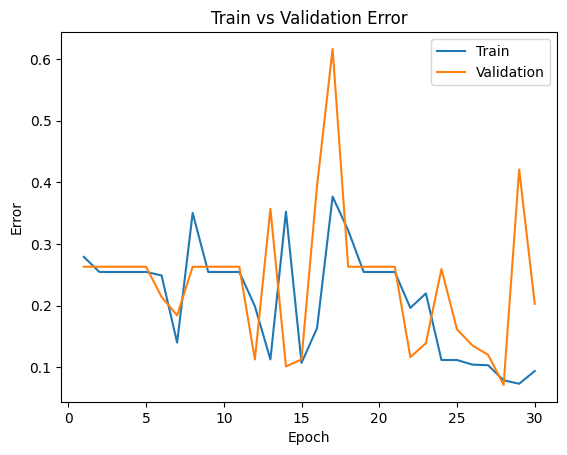

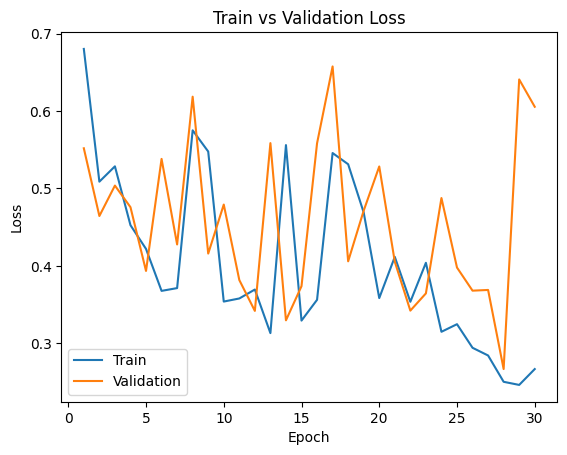

In [149]:
model_path = get_model_name("parkinson_baseline", batch_size=32, learning_rate=0.01, epoch=30)
plot_training_curve(model_path)

Acc: 0.8735, Prec: 0.8703, Rec: 0.8227


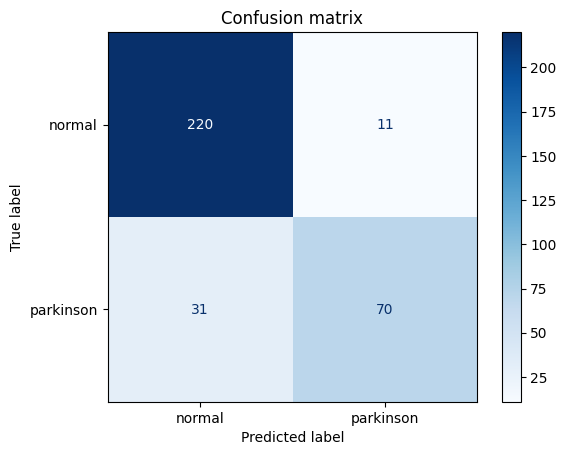

In [141]:
acc_baseline, prec_baseline, rec_baseline = eval_metrics(model_baseline3, test_dataset, batchsize=32, classes=classes)

Lot's of spikes, but lets ultimately test out baselinemodel on the test dataset, and see the accuracy it can achieve.

The next section will focus on the creation of the Primary model which we will tune to fit the dataset.

In [142]:
import torch.nn as nn
import torch.nn.functional as F

class ParkinsonNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ParkinsonNet, self).__init__()
        self.name = "parkinsonnet"
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128*32*32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc_out = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc_out(x)
        return x

Setting up the architecture for my model.

Training net code from the model. I don't have the evaluate function added because I didn't think it was needed just yet.

In [143]:
model = ParkinsonNet()
trainnet(model, 16, 0.001, 20, train_dataset, val_dataset)

Epoch 1: Train loss: 0.6086, Train error: 0.2547, Val loss: 0.5873, Val error: 0.2632
Epoch 2: Train loss: 0.5766, Train error: 0.2547, Val loss: 0.5840, Val error: 0.2632
Epoch 3: Train loss: 0.5736, Train error: 0.2547, Val loss: 0.5815, Val error: 0.2632
Epoch 4: Train loss: 0.5691, Train error: 0.2547, Val loss: 0.5796, Val error: 0.2632
Epoch 5: Train loss: 0.5667, Train error: 0.2547, Val loss: 0.5753, Val error: 0.2632
Epoch 6: Train loss: 0.5634, Train error: 0.2547, Val loss: 0.5708, Val error: 0.2632
Epoch 7: Train loss: 0.5575, Train error: 0.2547, Val loss: 0.5650, Val error: 0.2632
Epoch 8: Train loss: 0.5506, Train error: 0.2547, Val loss: 0.5569, Val error: 0.2632
Epoch 9: Train loss: 0.5390, Train error: 0.2547, Val loss: 0.5550, Val error: 0.2632
Epoch 10: Train loss: 0.5198, Train error: 0.2547, Val loss: 0.5404, Val error: 0.2632
Epoch 11: Train loss: 0.4946, Train error: 0.2425, Val loss: 0.5230, Val error: 0.2632
Epoch 12: Train loss: 0.4720, Train error: 0.2180, V

Running the model over 20 epochs with a small batch size.

Code to get the model path and graph the model

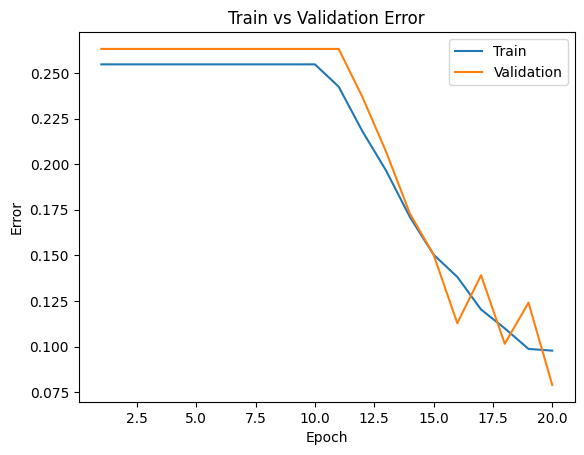

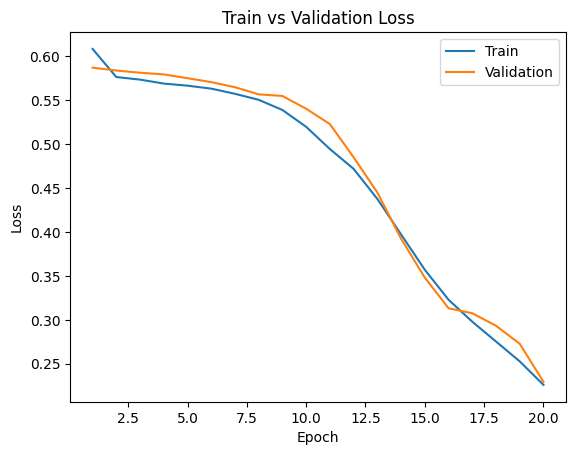

In [144]:
model_path = get_model_name("parkinsonnet", batch_size=16, learning_rate=0.001, epoch=20)
plot_training_curve(model_path)

Plotting the training curves.

In [ ]:
model2 = ParkinsonNet()
trainnet(model2, 32, 0.01, 30, train_dataset, val_dataset)

Epoch 1: Train loss: 0.5993, Train error: 0.2782, Val loss: 0.5829, Val error: 0.2632
Epoch 2: Train loss: 0.5705, Train error: 0.2547, Val loss: 0.6066, Val error: 0.2632
Epoch 3: Train loss: 0.5683, Train error: 0.2547, Val loss: 0.5621, Val error: 0.2632
Epoch 4: Train loss: 0.5410, Train error: 0.2547, Val loss: 0.5227, Val error: 0.2632
Epoch 5: Train loss: 0.4684, Train error: 0.2434, Val loss: 0.4532, Val error: 0.1692
Epoch 6: Train loss: 0.3958, Train error: 0.1626, Val loss: 0.4551, Val error: 0.2180
Epoch 7: Train loss: 0.3195, Train error: 0.1306, Val loss: 0.2720, Val error: 0.1053
Epoch 8: Train loss: 0.2527, Train error: 0.1006, Val loss: 0.5332, Val error: 0.2744
Epoch 9: Train loss: 0.3437, Train error: 0.1664, Val loss: 0.2244, Val error: 0.0827
Epoch 10: Train loss: 0.1942, Train error: 0.0733, Val loss: 0.1765, Val error: 0.0639
Epoch 11: Train loss: 0.2201, Train error: 0.0865, Val loss: 0.1639, Val error: 0.0526
Epoch 12: Train loss: 0.1402, Train error: 0.0517, V

: 

: 

: 

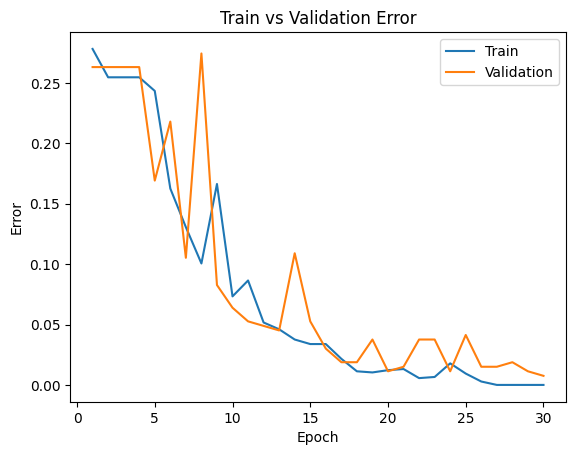

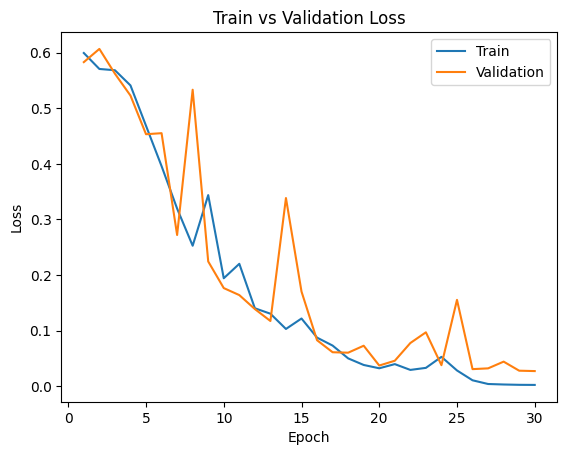

: 

: 

: 

In [ ]:
model_path = get_model_name("parkinsonnet", batch_size=32, learning_rate=0.01, epoch=30)
plot_training_curve(model_path)

In [ ]:
model3 = ParkinsonNet()
trainnet(model3, 32, 0.0075, 30, train_dataset, val_dataset)

Epoch 1: Train loss: 0.6021, Train error: 0.2547, Val loss: 0.5848, Val error: 0.2632
Epoch 2: Train loss: 0.5703, Train error: 0.2547, Val loss: 0.5859, Val error: 0.2632
Epoch 3: Train loss: 0.5600, Train error: 0.2547, Val loss: 0.5600, Val error: 0.2632
Epoch 4: Train loss: 0.5278, Train error: 0.2547, Val loss: 0.5176, Val error: 0.2632
Epoch 5: Train loss: 0.4663, Train error: 0.2547, Val loss: 0.4819, Val error: 0.2632
Epoch 6: Train loss: 0.3942, Train error: 0.1692, Val loss: 0.3448, Val error: 0.1165
Epoch 7: Train loss: 0.2944, Train error: 0.1278, Val loss: 0.6800, Val error: 0.3496
Epoch 8: Train loss: 0.2655, Train error: 0.1118, Val loss: 0.2158, Val error: 0.0789
Epoch 9: Train loss: 0.1661, Train error: 0.0630, Val loss: 0.1761, Val error: 0.0639
Epoch 10: Train loss: 0.1605, Train error: 0.0639, Val loss: 0.1850, Val error: 0.0526
Epoch 11: Train loss: 0.1335, Train error: 0.0517, Val loss: 0.1152, Val error: 0.0414
Epoch 12: Train loss: 0.1224, Train error: 0.0432, V

: 

: 

: 

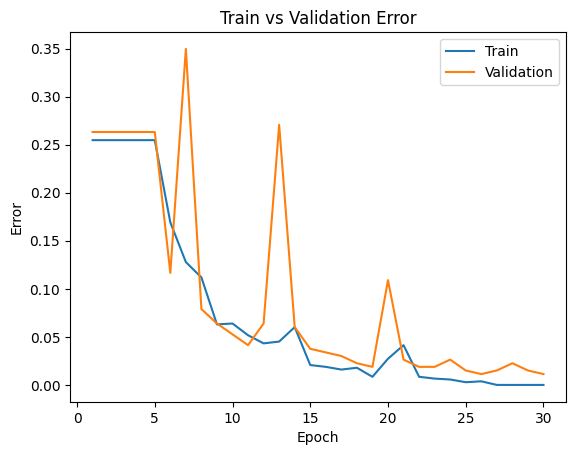

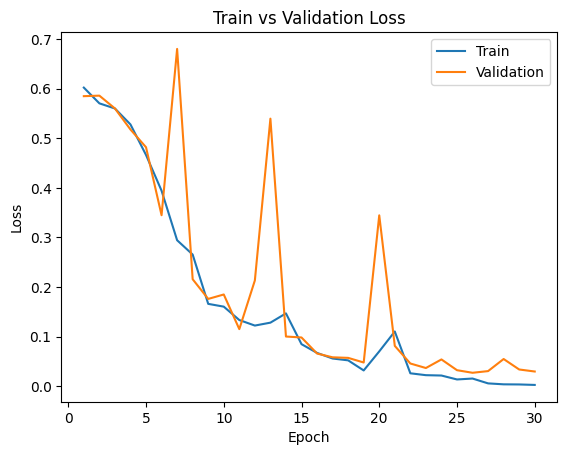

: 

: 

: 

In [ ]:
model_path = get_model_name("parkinsonnet", batch_size=32, learning_rate=0.0075, epoch=30)
plot_training_curve(model_path)

Now we make tweaks to our architecture to better improve accuracy and also smoother in the plotting
. I think one implementation I considered was adding in strided convolutions, and also batch normalization. The rationale is as follows: Batch normalization allows us to have roughly zero mean and zero unit varience. This will allow our optimization landscape to be smoother, leading to faster convergence and higher effective learning rates.

Strided convolutions on the other hand extract features and downsample, they are more commonly used within industry and can replace our max pooling layers. We can now test this new version of our model.

In [120]:
class ParkinsonNetStrided(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.name = "parkinsonnet_strided"

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1   = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2   = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3   = nn.BatchNorm2d(128)

        self.fc1 = nn.Linear(128 * 32 * 32, 128)
        self.dropout = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(128, 64)
        self.fc_out = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))

        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc_out(x)
        return x


In [121]:
model4 = ParkinsonNetStrided()
trainnet(model4, 32, 0.0075, 30, train_dataset, val_dataset)

Epoch 1: Train loss: 0.5006, Train error: 0.2434, Val loss: 0.3972, Val error: 0.2068
Epoch 2: Train loss: 0.3074, Train error: 0.1231, Val loss: 0.1864, Val error: 0.0639
Epoch 3: Train loss: 0.1662, Train error: 0.0583, Val loss: 0.1341, Val error: 0.0564
Epoch 4: Train loss: 0.1007, Train error: 0.0357, Val loss: 0.1007, Val error: 0.0338
Epoch 5: Train loss: 0.0576, Train error: 0.0179, Val loss: 0.1029, Val error: 0.0301
Epoch 6: Train loss: 0.0454, Train error: 0.0150, Val loss: 0.1089, Val error: 0.0338
Epoch 7: Train loss: 0.0325, Train error: 0.0132, Val loss: 0.0773, Val error: 0.0263
Epoch 8: Train loss: 0.0181, Train error: 0.0056, Val loss: 0.0519, Val error: 0.0188
Epoch 9: Train loss: 0.0253, Train error: 0.0113, Val loss: 0.0861, Val error: 0.0301
Epoch 10: Train loss: 0.0402, Train error: 0.0132, Val loss: 0.0419, Val error: 0.0188
Epoch 11: Train loss: 0.0156, Train error: 0.0038, Val loss: 0.0473, Val error: 0.0113
Epoch 12: Train loss: 0.0261, Train error: 0.0094, V

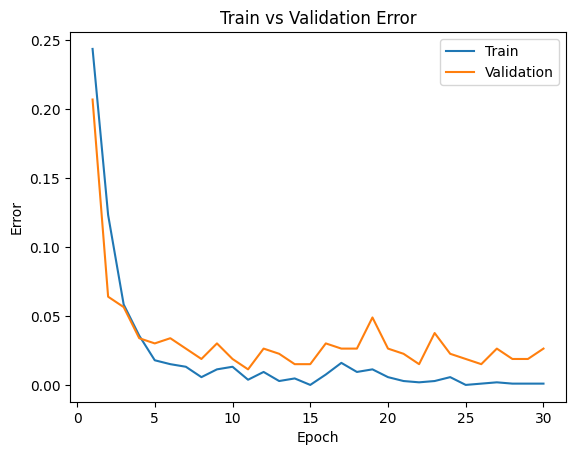

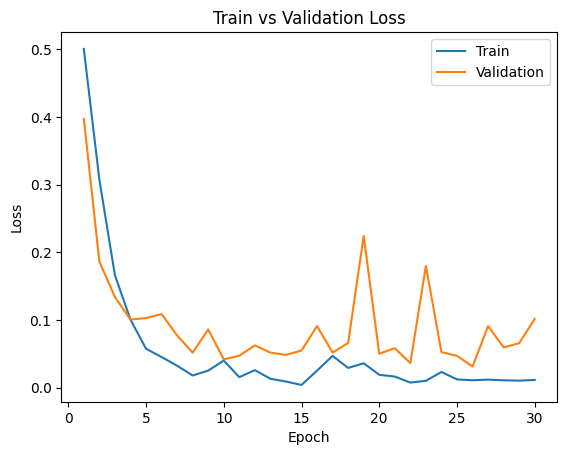

In [122]:
model_path = get_model_name("parkinsonnet_strided", batch_size=32, learning_rate=0.0075, epoch=30)
plot_training_curve(model_path)

We have enough models, and the above seems to do a pretty good job, so now we can move towards the final bit which is the testing of the main model to determine whether its good enough.

In [124]:
print(len(test_dataset))

332


In [125]:
print(len(test_dataset)*0.9759)

323.9988


Acc: 0.9819, Prec: 0.9842, Rec: 0.9731


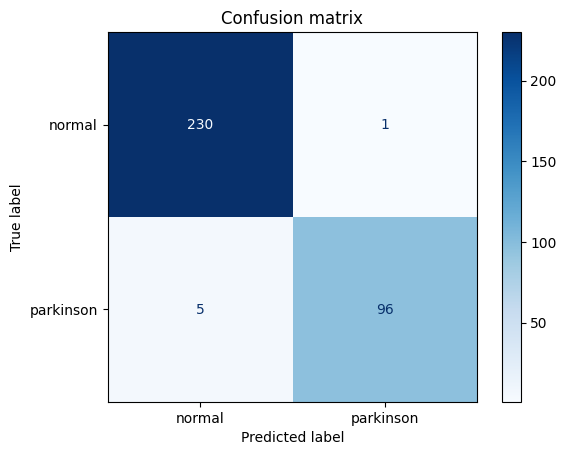

In [133]:
acc, prec, rec = eval_metrics(model4, test_dataset, batchsize=32, classes=classes)